In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder

# Here we Load The Data 


In [3]:
csv_Path = os.path.join("/Users/macbookpro/Desktop/For Graduation/Data During Edit/during party","Data(party).xlsx")
MyData = pd.read_xlsx(csv_Path)
MyData

AttributeError: module 'pandas' has no attribute 'read_xlsx'

# Convert The Data Type from Object into Date

In [5]:
MyData["Ad data push"] = MyData["Ad data push"].astype("datetime64[ns]")

In [6]:
MyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Make          531 non-null    object        
 1   Model         531 non-null    object        
 2   produce year  531 non-null    int64         
 3   Color         531 non-null    object        
 4   fuel Type     531 non-null    object        
 5   gear Type     531 non-null    object        
 6   eng power     531 non-null    int64         
 7   distance      531 non-null    int64         
 8   Origin        531 non-null    object        
 9   Ad data push  531 non-null    datetime64[ns]
 10  price         531 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 45.8+ KB


In [3]:
MyData.describe()

,produce year,eng power,distance,price
count,531.000000,531.000000,5.310000e+02,531.000000
mean,2008.126177,1714.504708,1.302195e+05,80047.661017
std,6.650939,499.847103,1.494819e+05,89491.850605
min,1979.000000,125.000000,8.000000e+03,1111.000000
25%,2006.000000,1400.000000,4.950000e+04,47750.000000
50%,2010.000000,1600.000000,9.400000e+04,67000.000000
75%,2013.000000,1900.000000,1.500000e+05,88500.000000
max,2016.000000,4800.000000,1.950000e+06,950000.000000


# Histogram Our Data

array([[<AxesSubplot:title={'center':'produce year'}>,
        <AxesSubplot:title={'center':'eng power'}>],
       [<AxesSubplot:title={'center':'distance'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

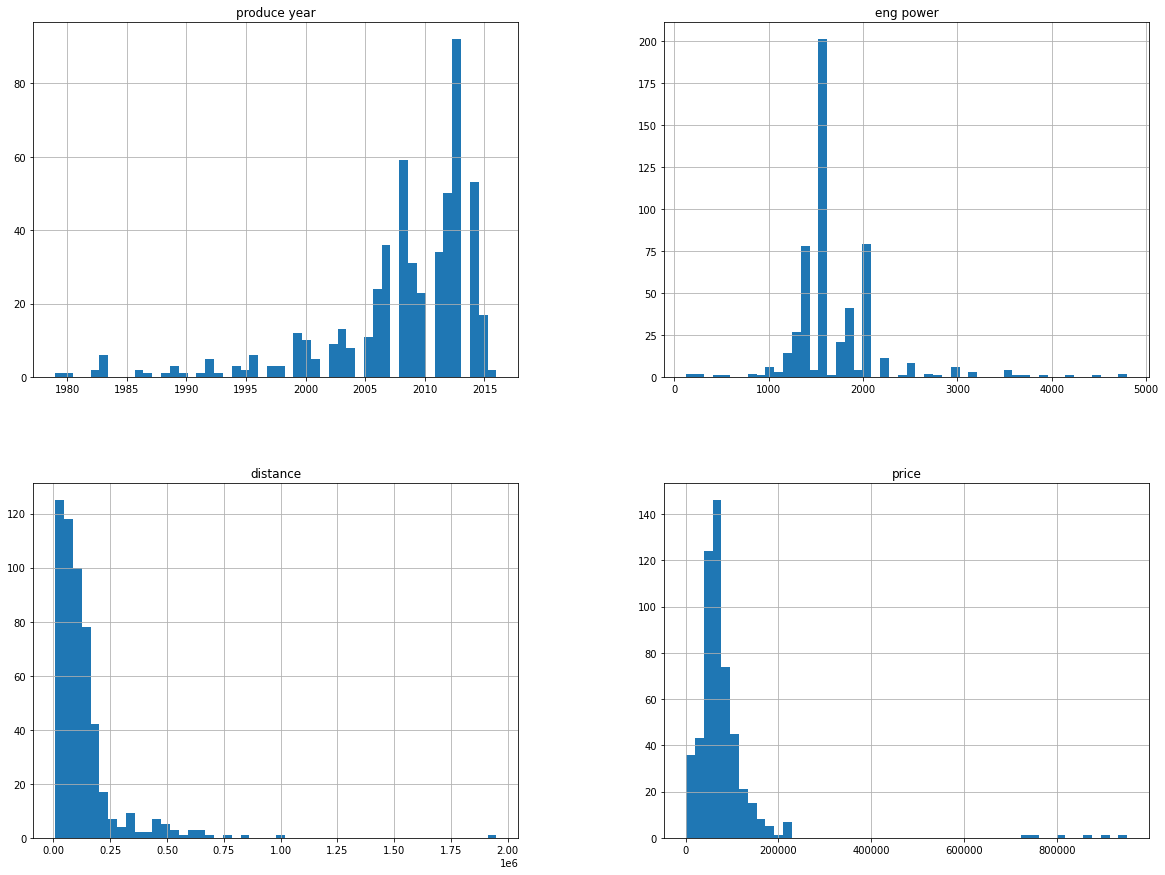

In [7]:
MyData.hist(bins=50,figsize=(20,15))

# Extract Label(price) from data 

In [8]:
# Extract Label(price) from data
X = MyData.loc[:,MyData.columns != 'price']
y = MyData.loc[:, 'price'].values

In [ ]:
# To check The Categorial
Car_Name = MyData[["Ad data push"]]
enc = OneHotEncoder()
Firstname = enc.fit_transform(Car_Name)
Firstname.toarray()
enc.categories_

# Define an Encoder " OneHotEncoder" To Deal with The Catergorial Data

In [9]:
enc = OneHotEncoder(handle_unknown='ignore')
enc1 = OneHotEncoder(handle_unknown='ignore')
enc2 = OneHotEncoder(handle_unknown='ignore')
enc3 = OneHotEncoder(handle_unknown='ignore')
enc4 = OneHotEncoder(handle_unknown='ignore')
enc5 = OneHotEncoder(handle_unknown='ignore')
enc6 = OneHotEncoder(handle_unknown='ignore')

In [10]:
# Deal with The First Column "Make"
enc_df = pd.DataFrame(enc.fit_transform(X[["Make"]]).toarray())
# merge with The Created Set
X = X.join(enc_df)
X

,Make,Model,produce year,Color,fuel Type,gear Type,eng power,distance,Origin,Ad data push,...,22,23,24,25,26,27,28,29,30,31
0,Fiat,Panda,2010,Golden,Petrol,manuel,1250,100000,private,2016-09-24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Kia,Cerato,2007,Silver,Petrol,Automatic,1600,103000,private,2016-09-26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Opel,Astra,2011,Black,Petrol,manuel,1600,106000,private,2016-09-20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,VW,Polo,2011,Red,Petrol,manuel,1400,116000,private,2016-09-21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Kia,Sportage,2011,Residential,Diesel,Automatic,2000,118000,private,2016-09-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,Hyundai,i25,2011,White,Diesel,manuel,1600,70000,private,2016-09-25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
527,Opel,Corsa,2012,Kermidi,Petrol,manuel,1400,77000,private,2016-09-21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
528,Citroen,Ds5,2015,Russet,Petrol,Automatic,1600,8000,private,2016-09-26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
529,Volkswagen,Passat,2006,Black Metallic,Diesel,Automatic,2000,85000,private,2016-09-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
enc_df1 = pd.DataFrame(enc1.fit_transform(X[["Model"]]).toarray())
enc_df1.columns = ['107', '2002', '2008', '206+', '207', '220', '3', '301', '305',
        '307', '308', '316', '318', '323', '325',
        '328i sport line black edition', '330', '3900', '405', '406',
        '412', '416', '508', '520', '525', '55', '6', '6 +1', '80', '814',
        'A4', 'A5', 'A80', 'Accent', 'Ascona', 'Astra', 'Avante', 'Aveo',
        'Berlingo', 'Bora', 'Brantr', 'C-Elysee', 'C200', 'C220', 'C250',
        'C4', 'C4 Picasso', 'C5', 'CC', 'CR-V', 'Caddy', 'Cerato', 'Civic',
        'Click', 'Cordoba', 'Corolla', 'Corsa', 'Cruze', 'Ds5', 'E270',
        'E90', 'Elantra', 'Fabia', 'Felicia', 'Fiesta', 'Fl6', 'Fl614',
        'Focus', 'Ford Turnzi', 'Forte', 'GL350', 'GTI', 'Gates', 'Golf',
        'Golf Plus', 'Hendaa', 'Ibiza', 'Impreza', 'Jetta', 'Juke',
        'Jumpy2012', 'Kadett', 'Kraval', 'Kravcr', 'L200', 'LT', 'Lancer',
        'Land Cruiser', 'ML350', 'Malibu', 'Matiz', 'Mercedes CLA200',
        'Octavia', 'Optima', 'Optra', 'Pajero', 'Panda', 'Partner',
        'Passat', 'Piaggio 250', 'Picanto', 'Polo', 'Polo Match 2013',
        'Pride', 'Punto', 'Q5', 'Q7', 'R9', 'Rapid', 'Rio', 'Roomster',
        'SL350', 'Santaver', 'Savannah', 'Sayed', 'Sazuki GS500', 'Sonata',
        'Sorento', 'Soul', 'Space Star', 'Sportage', 'Sprinter', 'Superb',
        'Tiguan', 'Tiida', 'Touran', 'Transporter', 'Traverse', 'Trooper',
        'Tucson', 'Uno', 'Vectra', 'Velostr', 'Verna', 'Vorino', 'Vrino',
        'Wide', 'Yeti', 'Young Rxton', 'Zafira', 'a3', 'ant',
        'cf 6x4 430 flipflop', 'developer', 'doblo', 'eyelash',
        'eyelash 2009', 'i10', 'i120', 'i20', 'i25', 'i30', 'ix35', 's400',
        's75', 'sofa', 'x3']
X = X.join(enc_df1)
X

,Make,Model,produce year,Color,fuel Type,gear Type,eng power,distance,Origin,Ad data push,...,i10,i120,i20,i25,i30,ix35,s400,s75,sofa,x3
0,Fiat,Panda,2010,Golden,Petrol,manuel,1250,100000,private,2016-09-24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Kia,Cerato,2007,Silver,Petrol,Automatic,1600,103000,private,2016-09-26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Opel,Astra,2011,Black,Petrol,manuel,1600,106000,private,2016-09-20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,VW,Polo,2011,Red,Petrol,manuel,1400,116000,private,2016-09-21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Kia,Sportage,2011,Residential,Diesel,Automatic,2000,118000,private,2016-09-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,Hyundai,i25,2011,White,Diesel,manuel,1600,70000,private,2016-09-25,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
527,Opel,Corsa,2012,Kermidi,Petrol,manuel,1400,77000,private,2016-09-21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
528,Citroen,Ds5,2015,Russet,Petrol,Automatic,1600,8000,private,2016-09-26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
529,Volkswagen,Passat,2006,Black Metallic,Diesel,Automatic,2000,85000,private,2016-09-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

# enc_df2 = pd.DataFrame(enc2.fit_transform(X[["Color"]]).toarray())
# enc_df2.columns = ['Army color ', 'Black ', 'Black Metallic ', 'Blue ', 'Blue Cyan ',
#         'Brown ', 'Ferrani ', 'Golden ', 'Gray ', 'Green ', 'Ivory ',
#         'Kermidi ', 'Oily Color ', 'Orange ', 'Purple ', 'Red ',
#         'Residential ', 'Russet ', 'Silver ', 'White ', 'White Ivory ',
#         'Yellow ', 'grey R ', 'بترولي ', 'عدة الوان ']


# X = X.join(enc_df2)


In [12]:

enc_df3 = pd.DataFrame(enc3.fit_transform(X[["fuel Type"]]).toarray())
enc_df3.columns = ['Diesel ', 'Petrol ']
X = X.join(enc_df3)


In [13]:

enc_df4 = pd.DataFrame(enc4.fit_transform(X[["gear Type"]]).toarray())
enc_df4.columns = ['Automatic', 'manuel']
X = X.join(enc_df4)


In [14]:

enc_df5 = pd.DataFrame(enc5.fit_transform(X[["Origin"]]).toarray())
enc_df5.columns = ['Commercial ', 'Rental ', 'Taxi ', 'private ', 'training ']
X = X.join(enc_df5)


In [ ]:
# enc_df6 = pd.DataFrame(enc5.fit_transform(X[["Ad data push"]]).toarray())
# enc_df6.columns = ['2016-01-10T00:00:00.000000000', '2016-02-10T00:00:00.000000000',
#         '2016-09-20T00:00:00.000000000', '2016-09-21T00:00:00.000000000',
#         '2016-09-22T00:00:00.000000000', '2016-09-24T00:00:00.000000000',
#         '2016-09-25T00:00:00.000000000', '2016-09-26T00:00:00.000000000',
#         '2016-09-27T00:00:00.000000000', '2016-09-28T00:00:00.000000000',
#         '2016-09-30T00:00:00.000000000', '2016-10-10T00:00:00.000000000',
#         '2017-03-01T00:00:00.000000000']
# X = X.join(enc_df6)

# Drop the Unneccessary Column after Created The New Cloumn

In [15]:
X.drop("Make",axis="columns",inplace=True)
X.drop("Model",axis="columns",inplace=True)
X.drop("Color",axis="columns",inplace=True)
X.drop("fuel Type",axis="columns",inplace=True)
X.drop("gear Type",axis="columns",inplace=True)
X.drop("Origin",axis="columns",inplace=True)
X.drop("Ad data push",axis="columns",inplace=True)

# Split The Data 

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)

print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))


398
133
398
133


In [ ]:
New_Car = np.array(['Skoda','Octavia',2016,'Silver','Petrol','Automatic',1400,70000,'private'])
New_Car2 = [2016,1400]



New_Car2+=enc.transform(New_Car[0].reshape(-1, 1))
New_Car2+=enc1.transform(New_Car[1].reshape(-1, 1))
New_Car2+=enc3.transform(New_Car[4].reshape(-1, 1))
New_Car2+=enc4.transform(New_Car[5].reshape(-1, 1))
New_Car2+=enc5.transform(New_Car[8].reshape(-1, 1))


In [ ]:
X.info()


<AxesSubplot:xlabel='produce year', ylabel='price'>

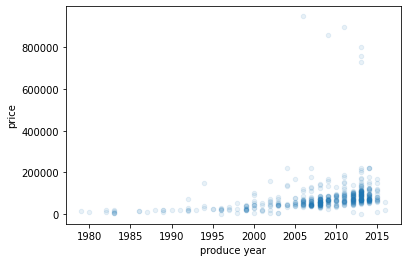

In [17]:
MyData.plot(kind="scatter",x="produce year",y="price",alpha=0.1)

# Lock For The Corrloation

In [18]:
Corr = MyData.corr()
Corr

,produce year,eng power,distance,price
produce year,1.000000,-0.118217,-0.245961,0.253754
eng power,-0.118217,1.000000,0.149251,0.157836
distance,-0.245961,0.149251,1.000000,-0.082169
price,0.253754,0.157836,-0.082169,1.000000


array([[<AxesSubplot:xlabel='produce year', ylabel='produce year'>,
        <AxesSubplot:xlabel='eng power', ylabel='produce year'>,
        <AxesSubplot:xlabel='distance', ylabel='produce year'>,
        <AxesSubplot:xlabel='price', ylabel='produce year'>],
       [<AxesSubplot:xlabel='produce year', ylabel='eng power'>,
        <AxesSubplot:xlabel='eng power', ylabel='eng power'>,
        <AxesSubplot:xlabel='distance', ylabel='eng power'>,
        <AxesSubplot:xlabel='price', ylabel='eng power'>],
       [<AxesSubplot:xlabel='produce year', ylabel='distance'>,
        <AxesSubplot:xlabel='eng power', ylabel='distance'>,
        <AxesSubplot:xlabel='distance', ylabel='distance'>,
        <AxesSubplot:xlabel='price', ylabel='distance'>],
       [<AxesSubplot:xlabel='produce year', ylabel='price'>,
        <AxesSubplot:xlabel='eng power', ylabel='price'>,
        <AxesSubplot:xlabel='distance', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>]], dtype=object)

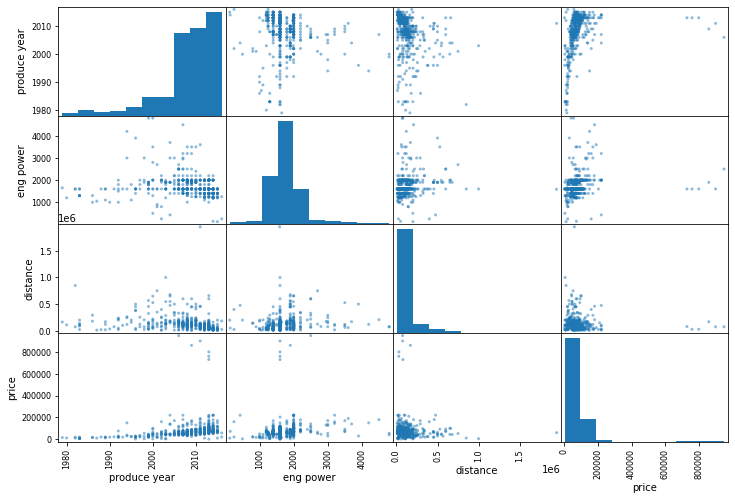

In [19]:
attr = ["Make","Model","produce year","Color","fuel Type","gear Type","eng power","distance","Origin","Ad data push","price"]

scatter_matrix(MyData[attr],figsize=(12,8))


# Now We want To build Multiple Model To get The Result

In [20]:
import sklearn.linear_model

model = sklearn.linear_model.LinearRegression()
model2 = sklearn.linear_model.LogisticRegression()

gen_Liner = model.fit(X_train,Y_train)
gen_Logistic = model2.fit(X_train,Y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
Y_p = gen_Logistic.predict(X_test)

print(Y_p[1])
print(Y_test[1])


68000
57000


In [23]:
y_p=gen_Liner.predict(X_train)

print(round(y_p[1]))
print(Y_train[1])


29526
22000


In [24]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-3,3,num=14) # range for alpha
grid = GridSearchCV(estimator=Lasso(), param_grid=dict(alpha=alphas))
grid.fit(X_train,Y_train)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457151184634.0133, tolerance: 228263869.2822469
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228308565391.8393, tolerance: 234673460.49246335
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 380790601310.84033, tolerance: 241322432.99313453
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_m

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219376567820.19684, tolerance: 250478303.92567134
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 671637827989.1812, tolerance: 228263869.2822469
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 509316864073.8032, tolerance: 234673460.49246335
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_m

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03])})

In [25]:
from sklearn.linear_model import Ridge

alphas = np.logspace(-3,3,num=14) # range for alpha

grid2 = GridSearchCV(estimator=Ridge(), param_grid=dict(alpha=alphas)) 
grid2.fit(X_train,Y_train)



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.68717e-17): result may not be accurate.
  overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.25386e-17): result may not be accurate.
  overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.67256e-17): result may not be accurate.
  overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.4983e-17): result may not be accurate.
  overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03])})

In [ ]:
# accuracy = grid2.score(X_test,Y_test)
# print(accuracy*100,'%')

In [26]:
pp_Lasso = grid.predict(X_test)
print(round(pp_Lasso[1]))
print(Y_test[1])


60268
57000


In [27]:
pp_Ridge = grid2.predict(X_test)
print(round(pp_Ridge[1]))
print(Y_test[1])


63259
57000


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1)
# grid_search = GridSearchCV(knn_clf, param_grid, cv=3, verbose=3)
knn_clf.fit(X_train,Y_train)
y_k_pred = knn_clf.predict(X_test)

print(y_k_pred[1])
print(Y_test[1])

16000
57000


In [1]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42,n_jobs=-1)
sgd_clf.fit(X_train,Y_train)
y_t_p = sgd_clf.predict(X_test)

print(y_t_p[1])
print(Y_test[1])



NameError: name 'X_train' is not defined

In [29]:
rf = RandomForestClassifier(n_estimators=100,
                            random_state=0)
rf.fit(X_train, Y_train)

Pre = rf.predict(X_test)

print(Pre[1])
print(Y_test[1])


82900
57000
